## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [6]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import seaborn as sns # 另一個繪圖-樣式套件

import matplotlib.pyplot as plt
%matplotlib inline

### 之前做過的處理

In [2]:
# 設定 data_path
dir_data = './data/'
f_app_train = os.path.join(dir_data, 'application_train.csv')
f_app_test = os.path.join(dir_data, 'application_test.csv')

app_train = pd.read_csv(f_app_train)
app_test = pd.read_csv(f_app_test)

from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
# also apply to testing dataset
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

# absolute the value of DAYS_BIRTH
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_test['DAYS_BIRTH'] = abs(app_test['DAYS_BIRTH'])

In [3]:
app_train['CNT_FAM_MEMBERS_BINNED'] = pd.cut(app_train["CNT_FAM_MEMBERS"], 8)
app_train['CNT_FAM_MEMBERS_BINNED'].value_counts()

(0.981, 3.375]     278805
(3.375, 5.75]       28175
(5.75, 8.125]         509
(8.125, 10.5]           9
(12.875, 15.25]         4
(10.5, 12.875]          3
(17.625, 20.0]          2
(15.25, 17.625]         2
Name: CNT_FAM_MEMBERS_BINNED, dtype: int64

/Applications/Utilities/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


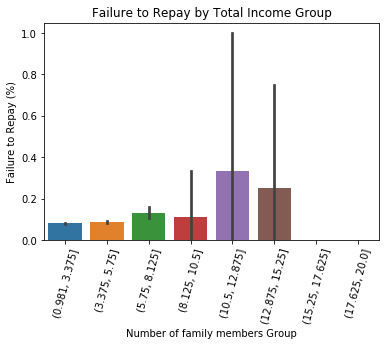

In [7]:
px = app_train['CNT_FAM_MEMBERS_BINNED']
py = app_train['TARGET']
sns.barplot(px, py)
plt.xticks(rotation = 75); plt.xlabel('Number of family members Group'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Total Income Group');